In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
start = '2012-01-01'
end = '2024-03-26'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...
2024-03-19,148.979996,149.619995,147.009995,147.919998,147.919998,17748400
2024-03-20,148.789993,149.759995,147.664993,149.679993,149.679993,17730000
2024-03-21,150.320007,151.304993,148.009995,148.740005,148.740005,19843900


In [6]:
data.reset_index(inplace = True)

In [7]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
3071,2024-03-19,148.979996,149.619995,147.009995,147.919998,147.919998,17748400
3072,2024-03-20,148.789993,149.759995,147.664993,149.679993,149.679993,17730000
3073,2024-03-21,150.320007,151.304993,148.009995,148.740005,148.740005,19843900
3074,2024-03-22,150.240005,152.559998,150.089996,151.770004,151.770004,19226300


In [8]:
data.iloc[2760]

Date         2022-12-20 00:00:00
Open                   88.730003
High                   89.779999
Low                    88.040001
Close                  89.629997
Adj Close              89.629997
Volume                  21976800
Name: 2760, dtype: object

In [9]:
# moving average
ma_100_days = data.Close.rolling(100).mean()

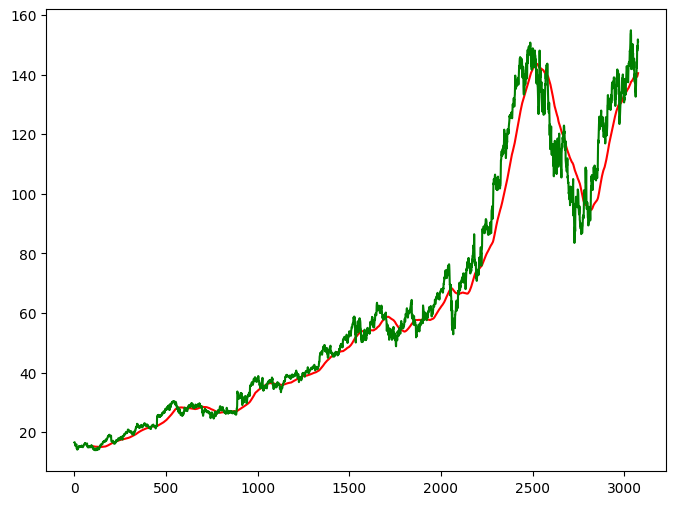

In [10]:
plt.figure(figsize = (8, 6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [11]:
ma_200_days = data.Close.rolling(200).mean()

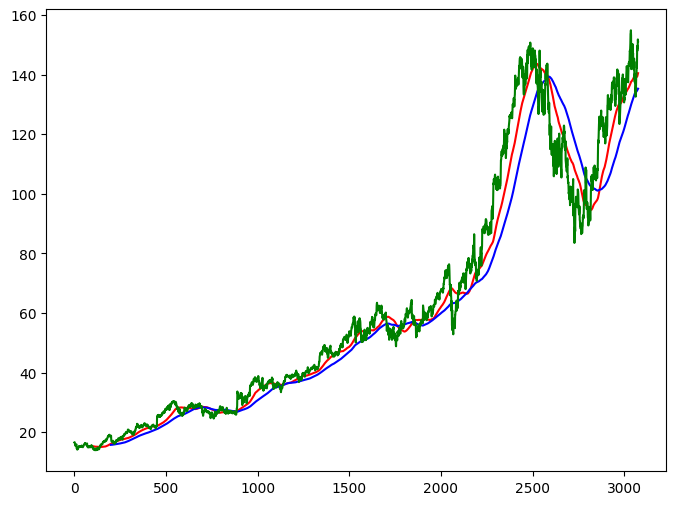

In [12]:
plt.figure(figsize = (8, 6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [13]:
data.dropna(inplace  = True)

In [14]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
3071,2024-03-19,148.979996,149.619995,147.009995,147.919998,147.919998,17748400
3072,2024-03-20,148.789993,149.759995,147.664993,149.679993,149.679993,17730000
3073,2024-03-21,150.320007,151.304993,148.009995,148.740005,148.740005,19843900
3074,2024-03-22,150.240005,152.559998,150.089996,151.770004,151.770004,19226300


In [15]:
data.shape

(3076, 7)

In [16]:
data_train = pd.DataFrame(data.Close[0: int(len(data) * 0.80)])
data_test = pd.DataFrame(data.Close[int(len(data) * 0.80): len(data)])

In [17]:
data_train.shape[0]

2460

In [18]:
data_test.shape[0]

616

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [20]:
data_train_scale = scaler.fit_transform(data_train)

In [21]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i - 100 : i])
    y.append(data_train_scale[i, 0])

In [22]:
x, y = np.array(x), np.array(y)

In [23]:
# creating a model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

2024-03-26 09:18:24.969706: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-26 09:18:24.969797: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-26 09:18:25.102967: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [24]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
              input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))



model.add(Dense(units = 1))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
model.fit(x, y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
 2/74 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.1664  

I0000 00:00:1711444741.491187     137 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


74/74 ━━━━━━━━━━━━━━━━━━━━ 28s 173ms/step - loss: 0.0479
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0052
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0046
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0037
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0038
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0039
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0033
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0027
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0026
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0026
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0024
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0021
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0022
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0022
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0019
Epoch 16/50
7

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [29]:
past_100_days = data_train.tail(100)

In [30]:
data_test = pd.concat([past_100_days, data_test], ignore_index = True)

In [31]:
data_test

,Close
0,117.804497
1,117.254997
2,120.333504
3,120.453499
4,121.676498
...,...
711,147.919998
712,149.679993
713,148.740005
714,151.770004


In [32]:
data_test_scale = scaler.fit_transform(data_test)

In [33]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i - 100 : i])
    y.append(data_test_scale[i, 0])

In [34]:
x, y = np.array(x), np.array(y)

In [35]:
y_predict = model.predict(x)

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step


In [39]:
scale = 1/scaler.scale_

In [40]:
y_predict = y_predict * scale

In [41]:
y = y * scale

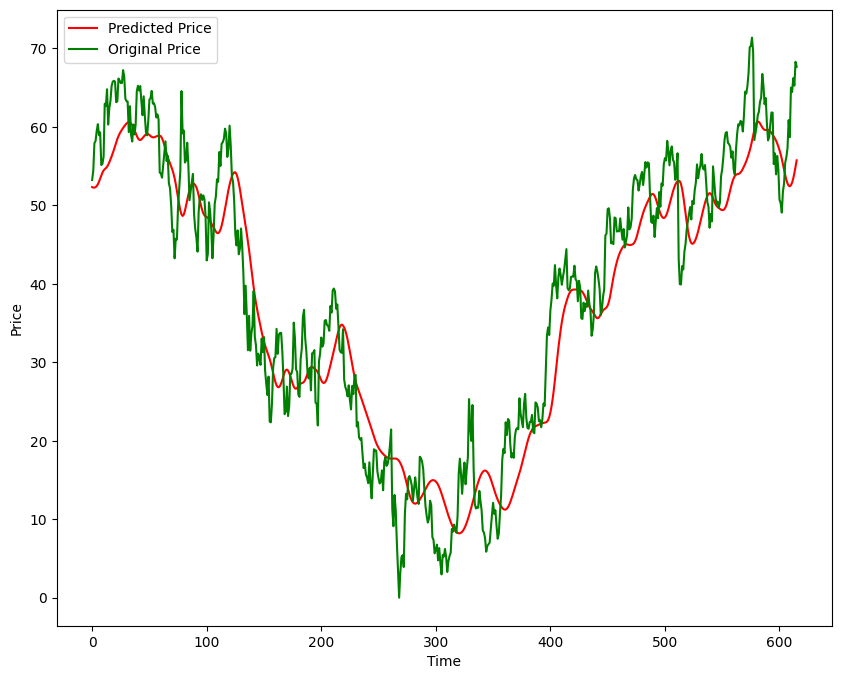

In [42]:
plt.figure(figsize = (10, 8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [43]:
model.save('Stock Prediction Model.keras')